In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-reviews/winemag-data-130k-v2.json
/kaggle/input/wine-reviews/winemag-data_first150k.csv
/kaggle/input/wine-reviews/winemag-data-130k-v2.csv


# Laden von Daten

* Pfad zur Datei
* index_col Spalte die wir als Index nutzen wollen (optional).

In [2]:
wines = pd.read_csv("../input/wine-reviews/winemag-data-130k-v2.csv", index_col=0)

# Erste 5 Zeilen ausgeben mit head()

In [3]:
wines.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Nur 3 Zeilen ausgeben: head(3)

In [4]:
wines.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


# Spalten auswählren

## Eine Spalte auswählen

In [5]:
wines["country"]

0            Italy
1         Portugal
2               US
3               US
4               US
            ...   
129966     Germany
129967          US
129968      France
129969      France
129970      France
Name: country, Length: 129971, dtype: object

## Mehrere Spalten auswählen und in einer Variablen speichern

In [6]:
wines[["country", "price"]]

,country,price
0,Italy,NaN
1,Portugal,15.0
2,US,14.0
3,US,13.0
4,US,65.0
...,...,...
129966,Germany,28.0
129967,US,75.0
129968,France,30.0
129969,France,32.0


Filterung ist nicht permanent

In [7]:
wines

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


Speicherung des Ergebnisses in eine neue Variable

In [8]:
country_prices = wines[["country", "price"]]

# Verschiedene Werte (unique)

In [9]:
wines["country"].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

# Verschiedene Werte zählen (value_counts)

In [10]:
wines["country"].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

### Und danach plotten

Method Chaining. Aneinanderreihen von Methoden

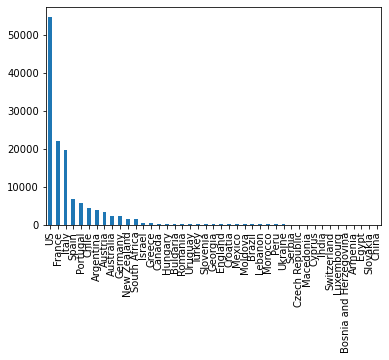

In [11]:
wines["country"].value_counts().plot(kind="bar")

# Statistiken einer Spalte

* erst Spalte auswählen
* Dann min, max. mean, median oder sum 


In [12]:
wines["price"].min()

4.0

In [13]:
wines["price"].max()

3300.0

In [14]:
wines["price"].mean()

35.363389129985535

In [15]:
wines["price"].median()

25.0

Ergebnis in einer Variable speichern

In [16]:
maxprice = wines["price"].max()

In [17]:
maxprice

3300.0

# Zeilen Filtern

Alle Weine aus Deutschland

In [18]:
wines[wines["country"] == "Germany"]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
15,Germany,Zesty orange peels and apple notes abound in t...,Devon,87,24.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,Richard Böcking
76,Germany,Earthy pollen and mineral notes lend a savory ...,NaN,86,9.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Schmitt Söhne 2015 Riesling (Rheinhessen),Riesling,Schmitt Söhne
85,Germany,"Pronounced dust, pollen and earth tones lend s...",Undone Dry,86,10.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,P.J. Valckenberg 2015 Undone Dry Riesling (Rhe...,Riesling,P.J. Valckenberg
148,Germany,"Crisp, pristine peach and apricot notes resona...",Dry,91,16.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Weingut Liebfrauenstift 2014 Dry Riesling (Rhe...,Riesling,Weingut Liebfrauenstift
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129918,Germany,"Despite plenty of honeyed sweetness, this wine...",Wehlener Sonnenuhr Spätlese,91,32.0,Mosel-Saar-Ruwer,NaN,NaN,Joe Czerwinski,@JoeCz,Dr. Loosen 2006 Wehlener Sonnenuhr Spätlese Ri...,Riesling,Dr. Loosen
129923,Germany,"Thick, oily and sweet, this wine is clearly no...",Erdener Treppchen Spätlese*,91,24.0,Mosel-Saar-Ruwer,NaN,NaN,Joe Czerwinski,@JoeCz,Stephan Ehlen 2006 Erdener Treppchen Spätlese*...,Riesling,Stephan Ehlen
129924,Germany,Imagine honeyed orange sections—that's what th...,Bernkasteler alte Badstube am Doctorberg Spätlese,91,31.0,Mosel-Saar-Ruwer,NaN,NaN,Joe Czerwinski,@JoeCz,Dr. Pauly Bergweiler 2006 Bernkasteler alte Ba...,Riesling,Dr. Pauly Bergweiler
129946,Germany,"Plump, clingy peach and honey notes are cut wi...",Dom,90,17.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Bischöfliche Weingüter Trier 2013 Dom Riesling...,Riesling,Bischöfliche Weingüter Trier


## Welcher Wein hatte den höchsten Preis? 

In [19]:
wines[wines["price"] == 3300]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


### Nutzung der Variable maxprice die wir vorher definiert hatten

In [20]:
wines[wines["price"] == maxprice]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
